In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [2]:
df = pd.read_csv('D:\datasets\winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Meta Data

# DATA DESCRIPTION

In [3]:
df.shape

(6497, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Duplicated Value

In [5]:
df[df.duplicated(keep=False)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6477,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [6]:
# drop duplicates
df = df.drop_duplicates()
df.shape

(5329, 13)

Missing Value

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
# drop missing value
df_null = df[df.isna().any(axis=1)]
df = df.dropna()
print(df.shape)
df.isnull().sum()

(5295, 13)


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

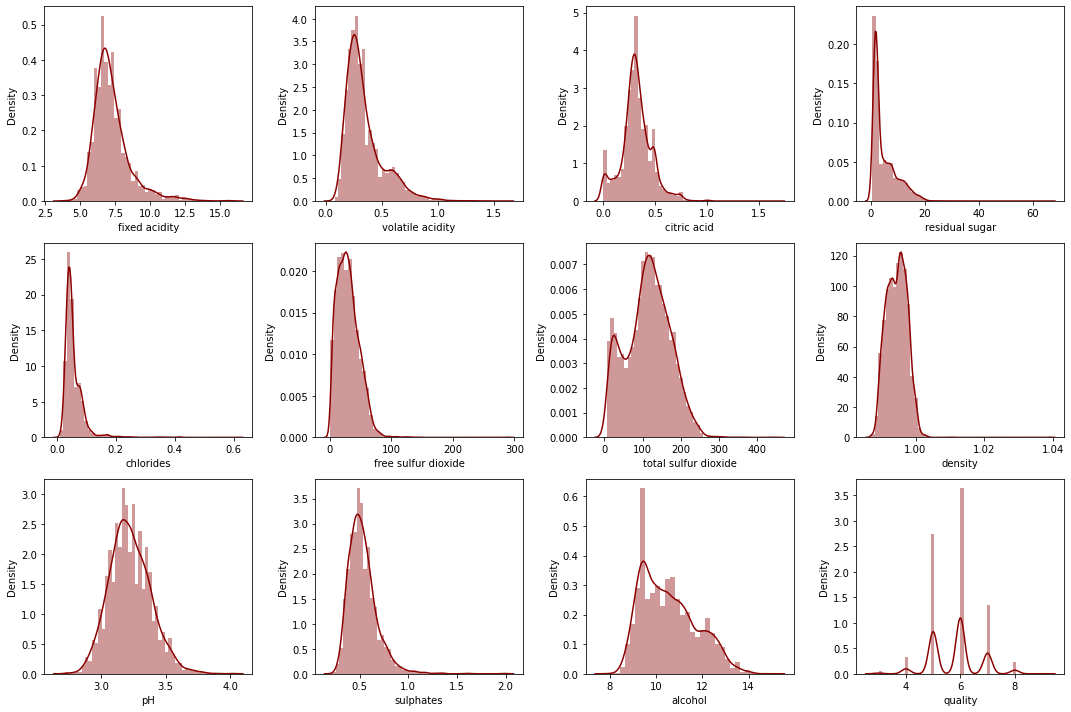

In [9]:
# Visualize the distribution of dataset 
plt.figure(figsize=(15,10))

columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
for ind, col in enumerate(columns):
    plt.subplot(3,4, ind+1)
    sns.distplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

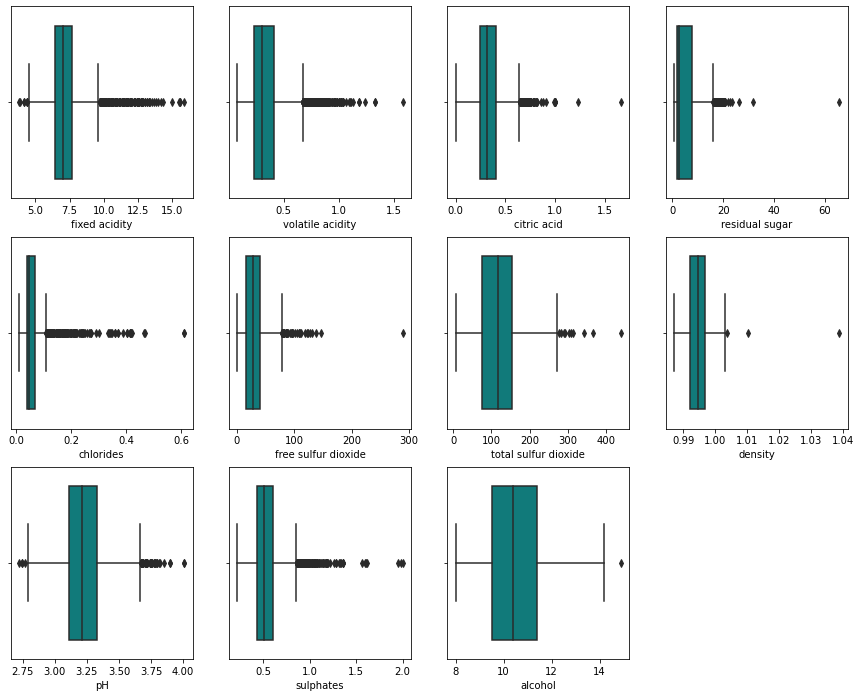

In [10]:
# detect outlier
plt.figure(figsize=(15,12))
for ind, col in enumerate(df.columns[1:-1]):
    plt.subplot(3,4, ind+1)
    sns.boxplot(data=df, x=col, color='darkcyan')

Handling with Outlier


In [11]:
# detective outlier
def zscore_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

def iqr_outliers(seri):
    outliers = []
    Q1, Q3= np.percentile(seri,[25,75])
    IQR = Q3 - Q1 
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    for ele in seri: 
        if ele>upper_fence or ele<lower_fence:
            outliers.append(ele)
    return outliers

In [12]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
cnt = 0
print('Number of outlier in each column')
for i in columns:
    li =  iqr_outliers(df[i])
    cnt += len(li)
    print(f'{i}: {len(li)}')
print('Total outlier of dataset:', cnt)

Number of outlier in each column
fixed acidity: 303
volatile acidity: 278
citric acid: 143
residual sugar: 140
chlorides: 235
free sulfur dioxide: 44
total sulfur dioxide: 10
density: 3
pH: 49
sulphates: 163
alcohol: 1
quality: 183
Total outlier of dataset: 1552


In [13]:
#remove oulier
def iqr_outliers(seri):
    q1 = seri.quantile(0.25)
    q3 = seri.quantile(0.75)
    iqr = q3 - q1
    up_fence = q3 + 1.5*iqr 
    low_fence = q1 - 1.5*iqr 
    return low_fence, up_fence

for col in df.columns[1:-1]:
    low, up = iqr_outliers(df[col])
    df = df[(df[col] > low) & (df[col] < up)]
df.shape

(3629, 13)

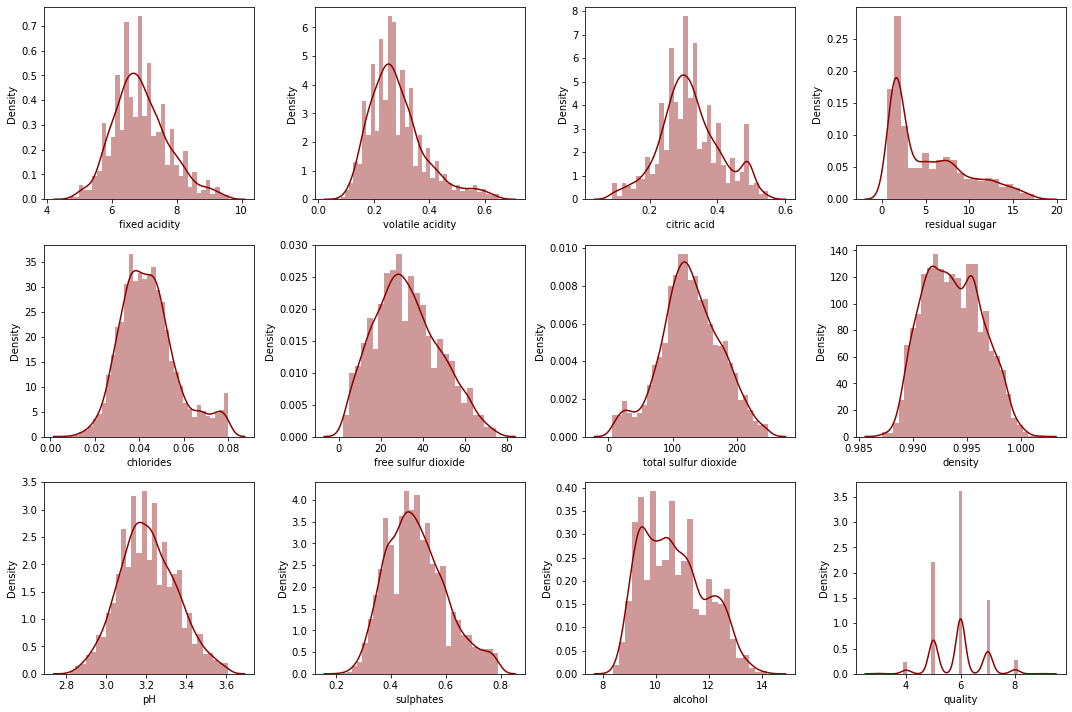

In [14]:
# visualize the distribution of dataset after remove outlier
plt.figure(figsize=(15,10))

columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
for ind, col in enumerate(columns):
    plt.subplot(3,4, ind+1)
    sns.distplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

Filling missing value

In [15]:
df = pd.concat([df, df_null])

In [16]:
# Filling missing value after remove outlier
for col in df.columns.drop(['type','quality']):
    df[col].fillna(df[col].mean(), inplace=True)

In [17]:
df.isnull().sum()
df.shape

(3663, 13)

In [18]:
# change columns type to binary
new_type = []
for i in df['type'].values:
    if i == 'white':
        new_type.append(1)
    else:
        new_type.append(0)
df['type'] = new_type
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.300000,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.300000,0.490000,9.5,6
2,1,8.100000,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.260000,0.440000,10.1,6
3,1,7.200000,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.190000,0.400000,9.9,6
6,1,6.200000,0.320000,0.16,7.0,0.045,30.0,136.0,0.99490,3.180000,0.470000,9.6,6
9,1,8.100000,0.220000,0.43,1.5,0.044,28.0,129.0,0.99380,3.220000,0.450000,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,0,6.400000,0.530000,0.09,3.9,0.123,14.0,31.0,0.99680,3.500000,0.494181,11.0,4
6428,0,6.892554,0.440000,0.09,2.2,0.063,9.0,18.0,0.99444,3.209507,0.690000,11.3,6
6429,0,6.892554,0.705000,0.10,2.8,0.081,13.0,28.0,0.99631,3.209507,0.660000,10.2,5
6486,0,7.200000,0.285503,0.33,2.5,0.068,34.0,102.0,0.99414,3.270000,0.780000,12.8,6


Labeling

In [19]:
new_col = []
for i in df['quality'].values:
    if i >= 7:
        new_col.append(1)
    else:
        new_col.append(0)
df['quality'] = new_col
df['quality'].value_counts()

0    2852
1     811
Name: quality, dtype: int64

Visualize the correlation of dataset

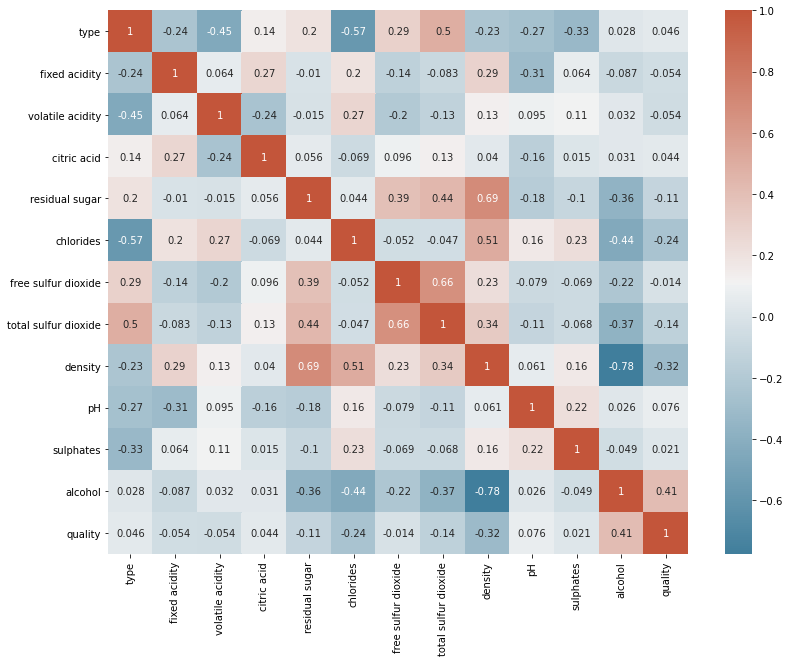

In [20]:
# pearson correlationo
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plotting
plt.figure(figsize=(13,10))
sns.heatmap(data=corr,annot=True, cmap=cmap)
plt.show()

In [21]:
(df['quality'].value_counts())/len(df['quality'])

0    0.778597
1    0.221403
Name: quality, dtype: float64

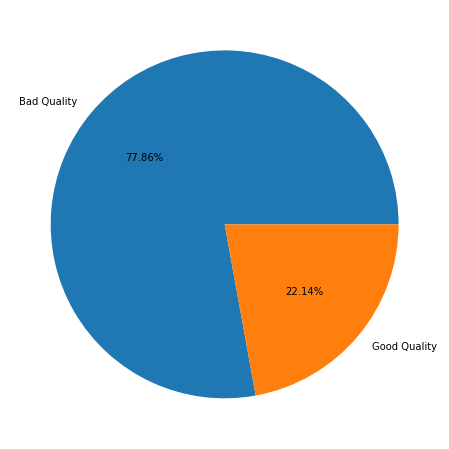

In [22]:
fig= plt.figure(figsize=(9,8))

value=(df['quality'].value_counts())/len(df['quality'])
labels= ['Bad Quality', 'Good Quality']
plt.pie(value, labels = labels, autopct='%.2f%%')

plt.show()

Scaling data

In [23]:
x = df.drop(columns={'quality'},axis=1)
y = df[['quality']]

In [24]:
# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

Split dataset

In [34]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

print(f'Total train record: {len(y_train)}')
print(f'Train set: {y_train.value_counts()}')
print('------------------------')
print(f'Total test record: {len(y_test)}')
print(f'Test set: {y_test.value_counts()}')


Total train record: 2930
Train set: quality
0          2295
1           635
dtype: int64
------------------------
Total test record: 733
Test set: quality
0          557
1          176
dtype: int64
      quality
3096        1
3393        0
680         0
3492        1
5942        0
...       ...
3383        0
643         0
1247        0
1168        0
4062        0

[2930 rows x 1 columns]


Generating Model

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       557
           1       0.59      0.27      0.37       176

    accuracy                           0.78       733
   macro avg       0.69      0.61      0.62       733
weighted avg       0.75      0.78      0.75       733

ACCURACY = 0.7789904502046384


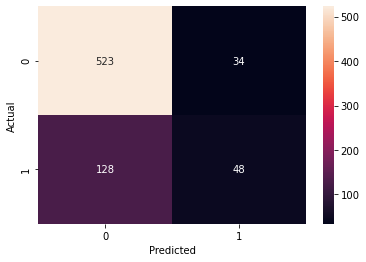

In [26]:
# Use model LogisticRegression
reg = LogisticRegression() #select the algorithm
reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output
y_hat = reg.predict(x_test)

# evaluate model
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_hat)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
print(classification_report(y_test, y_hat))
acc = metrics.accuracy_score(y_test,y_hat)# To know the accuracy
print(f'ACCURACY = {acc}')

HANDLING WITH IMBLANCED DATA

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler 

# define pipeline 
sm = SMOTE(random_state=42) 
x_train, y_train = sm.fit_resample(x_train, y_train)


print(f'Total train record: {len(y_train)}')
print(f'Train set: {y_train.value_counts()}')
print('------------------------')
print(f'Total test record: {len(y_test)}')
print(f'Test set: {y_test.value_counts()}')

Total train record: 4590
Train set: quality
0          2295
1          2295
dtype: int64
------------------------
Total test record: 733
Test set: quality
0          557
1          176
dtype: int64


Generating model after handling imbalanced data

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       557
           1       0.44      0.74      0.56       176

    accuracy                           0.71       733
   macro avg       0.67      0.72      0.67       733
weighted avg       0.79      0.71      0.73       733

ACCURACY = 0.7148703956343793


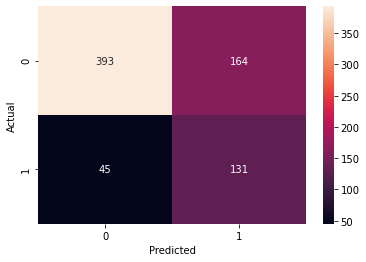

In [28]:
reg = LogisticRegression() #select the algorithm
reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output
y_hat = reg.predict(x_test)

# Evaluate model
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_hat)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
print(classification_report(y_test, y_hat))
acc = metrics.accuracy_score(y_test,y_hat)# To know the accuracy
print(f'ACCURACY = {acc}')

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() #select the algorithm
gnb.fit(x_train,y_train) # we fit the algorithm with the training data and the training output
y_hat = gnb.predict(x_test)

# Evaluate model
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))
acc = metrics.accuracy_score(y_test,y_hat)# To know the accuracy
print(f'ACCURACY = {acc}')

[[334 223]
 [ 37 139]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       557
           1       0.38      0.79      0.52       176

    accuracy                           0.65       733
   macro avg       0.64      0.69      0.62       733
weighted avg       0.78      0.65      0.67       733

ACCURACY = 0.645293315143247


In [32]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,0.919738,6.892554,0.285503,0.319831,5.314736,0.044218,32.453180,127.721813,0.993693,3.209507,0.494181,10.683965,0.221403
std,0.271736,0.847656,0.101931,0.089706,4.268421,0.012849,15.389914,46.722296,0.002652,0.143729,0.108555,1.190722,0.415248
min,0.000000,4.700000,0.080000,0.070000,0.600000,0.009000,2.000000,6.000000,0.987110,2.820000,0.220000,8.400000,0.000000
25%,1.000000,6.300000,0.220000,0.260000,1.700000,0.035500,21.000000,98.000000,0.991600,3.110000,0.410000,9.700000,0.000000
50%,1.000000,6.800000,0.270000,0.310000,3.850000,0.043000,31.000000,126.000000,0.993580,3.200000,0.480000,10.500000,0.000000
75%,1.000000,7.400000,0.330000,0.370000,8.000000,0.051000,43.000000,159.000000,0.995660,3.310000,0.560000,11.500000,0.000000
max,1.000000,9.800000,0.705000,0.630000,17.700000,0.147000,75.000000,248.000000,1.001700,3.610000,0.840000,14.200000,1.000000


In [33]:
list(enumerate(df.columns[1:-1]))

[(0, 'fixed acidity'),
 (1, 'volatile acidity'),
 (2, 'citric acid'),
 (3, 'residual sugar'),
 (4, 'chlorides'),
 (5, 'free sulfur dioxide'),
 (6, 'total sulfur dioxide'),
 (7, 'density'),
 (8, 'pH'),
 (9, 'sulphates'),
 (10, 'alcohol')]